In [14]:
cd /Users/amy/Desktop/ucd-sac-virt-data-pt-03-2021-u-c/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/

/Users/amy/Desktop/ucd-sac-virt-data-pt-03-2021-u-c/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions


In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [56]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [57]:
Base = automap_base()

In [58]:
Base.prepare(engine, reflect=True)

In [59]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [60]:
Measurement=Base.classes.measurement
Station=Base.classes.station

In [61]:
session = Session(engine,expire_on_commit=False)

In [ ]:
#to see what is in Measurement 
first_row = session.query(Measurement).first()
first_row.__dict__

In [ ]:
#to see what is in Station 
first_row = session.query(Station).first()
first_row.__dict__

In [217]:
#find the last date, which is 2017-08-23
first_row = session.query(Measurement.date).order_by(Measurement.date).all()
df=pd.DataFrame(first_row)
df

,0
0,2010-01-01
1,2010-01-01
2,2010-01-01
3,2010-01-01
4,2010-01-01
...,...
19545,2017-08-22
19546,2017-08-23
19547,2017-08-23
19548,2017-08-23


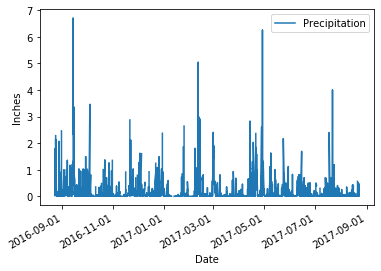

In [264]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

query_date

# Perform a query to retrieve the data and precipitation scores

df = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    filter(Measurement.date < '2017-08-24').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(df)
df
# Sort the dataframe by date

df.sort_values(by=0, inplace=True, ascending=True)
df.rename(columns={0:"Date",1:"Precipitation"},inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(x="Date",y="Precipitation")

dtFmt = mdates.DateFormatter('%Y-%m-%d') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
plt.ylabel("Inches")

plt.show()





In [64]:
# find the station id for Honolulu first
for row in session.query(Station,Station.name,Station.station).limit(50).all():
    print(row)

(<sqlalchemy.ext.automap.station object at 0x11def2be0>, 'WAIKIKI 717.2, HI US', 'USC00519397')
(<sqlalchemy.ext.automap.station object at 0x11def8860>, 'KANEOHE 838.1, HI US', 'USC00513117')
(<sqlalchemy.ext.automap.station object at 0x11def88d0>, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830')
(<sqlalchemy.ext.automap.station object at 0x11def8940>, 'PEARL CITY, HI US', 'USC00517948')
(<sqlalchemy.ext.automap.station object at 0x11def89b0>, 'UPPER WAHIAWA 874.3, HI US', 'USC00518838')
(<sqlalchemy.ext.automap.station object at 0x11def8a20>, 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523')
(<sqlalchemy.ext.automap.station object at 0x11def8ac8>, 'WAIHEE 837.5, HI US', 'USC00519281')
(<sqlalchemy.ext.automap.station object at 0x11def8b70>, 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918')
(<sqlalchemy.ext.automap.station object at 0x11def8c18>, 'MANOA LYON ARBO 785.2, HI US', 'USC00516128')


In [265]:
df["Precipitation"].describe()


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [266]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Measurement.station)).all()

[(19550,)]

In [143]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
df=pd.DataFrame(session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all())
df.sort_values(by=1, inplace=True, ascending=False)
df.rename(columns={0: "Station", 1: "Count"})

,Station,Count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [267]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
average=session.query(func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()
lowest=session.query(func.min(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()
highest=session.query(func.max(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()
print(lowest,highest,average)


[(54.0,)] [(85.0,)] [(71.66378066378067,)]


No handles with labels found to put in legend.


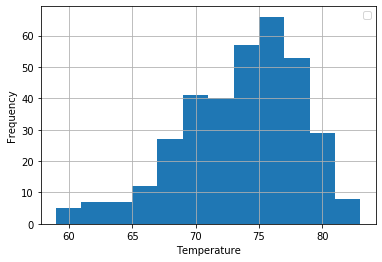

In [277]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-22').\
    filter(Measurement.date < '2017-08-24').\
    filter(Measurement.station=="USC00519281").all())

df.rename(columns={0: "Date", 1: "Temperature"},inplace=True)


plt.hist(df["Temperature"],bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid()
plt.legend()

In [ ]:
# Close Session
session.close()